In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading DataSet

In [2]:
da= pd.read_csv("Darknet_processed.csv")
pd.set_option('display.max_columns', None)
da.shape

(117056, 86)

### Training & Testing Data

In [3]:
features=['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg',
       'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg',
       'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min', 'Label.1']
X = da[features] # Features
y = da['Label']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state =1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Feature Selection with Recursive Feature Elimination

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
X_train10, X_test10, y_train10, y_test10 = train_test_split(X, y, test_size = 0.33,random_state =1)

In [6]:
sel = RFE(RandomForestClassifier(n_estimators = 100),n_features_to_select=20)
sel.fit(X_train10, y_train10)

RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

In [7]:
sel.get_support()

array([ True,  True, False,  True, False, False,  True,  True, False,
       False, False,  True, False, False, False, False,  True,  True,
        True, False,  True, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True])

In [8]:
selected_feat= X_train10.columns[(sel.get_support())]
len(selected_feat)

20

In [9]:
print(selected_feat)

Index(['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Flow Duration',
       'Total Length of Bwd Packet', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Flow Bytes/s',
       'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Fwd Header Length',
       'Fwd Packets/s', 'Bwd Segment Size Avg', 'FWD Init Win Bytes',
       'Bwd Init Win Bytes', 'Fwd Seg Size Min', 'Label.1'],
      dtype='object')


In [10]:
X1 = da[selected_feat] # Features

In [11]:
X_train1, X_test1, y_train1, y_test1= train_test_split(X1, y, test_size = 0.33,random_state =1)
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

### Applying GaussianNB before Feature Selection

In [12]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [13]:
y_pred = classifier.predict(X_test) 

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy for Naive Bayes: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix for Naive Bayes")
print(cm)

Accuracy for Naive Bayes:  0.5851821170623107
Confusion Matrix for Naive Bayes
[[15732 15022]
 [ 1002  6873]]


In [15]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.51      0.66     30754
           1       0.31      0.87      0.46      7875

    accuracy                           0.59     38629
   macro avg       0.63      0.69      0.56     38629
weighted avg       0.81      0.59      0.62     38629



In [16]:
from sklearn.metrics import precision_score
print ("Precision for Naive Bayes: ", precision_score(y_test, y_pred,average='weighted'))
from sklearn.metrics import recall_score
print ("Recall score for Naive Bayes: ", recall_score(y_test, y_pred,average='weighted'))
from sklearn.metrics import f1_score
print ("F1 score for Naive Bayes: ", f1_score(y_test, y_pred,average='weighted'))

Precision for Naive Bayes:  0.8124603021204716
Recall score for Naive Bayes:  0.5851821170623107
F1 score for Naive Bayes:  0.621626237409026


### Applying GaussianNB after Feature Selection

In [17]:
classifier1 = GaussianNB()
classifier1.fit(X_train1, y_train1)

GaussianNB()

In [18]:
y_p= classifier1.predict(X_test1) 

In [19]:
m = metrics.confusion_matrix(y_test1, y_p)
print ("Accuracy for Naive Bayes: ", accuracy_score(y_test1, y_p))
print("Confusion Matrix for Naive Bayes")
print(m)

Accuracy for Naive Bayes:  0.9139765461182013
Confusion Matrix for Naive Bayes
[[28692  2062]
 [ 1261  6614]]


In [20]:
print(metrics.classification_report(y_test1, y_p))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     30754
           1       0.76      0.84      0.80      7875

    accuracy                           0.91     38629
   macro avg       0.86      0.89      0.87     38629
weighted avg       0.92      0.91      0.92     38629



In [21]:
print ("Precision for Naive Bayes: ", precision_score(y_test1, y_p,average='weighted'))
print ("Recall score for Naive Bayes: ", recall_score(y_test1, y_p,average='weighted'))
print ("F1 score for Naive Bayes: ", f1_score(y_test1, y_p,average='weighted'))

Precision for Naive Bayes:  0.9180317854176133
Recall score for Naive Bayes:  0.9139765461182013
F1 score for Naive Bayes:  0.9154906166626585


### Applying Decision Tree Classifier before Feature Selection

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test)

In [23]:
cm5 = metrics.confusion_matrix(y_test, y_pred1)
print("Confusion Matrix for Decision Tree:")
print(cm5)

Confusion Matrix for Decision Tree:
[[30750     4]
 [    4  7871]]


In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print ("Precision: ", precision_score(y_test, y_pred1,average='weighted'))
print ("Recall score:  ", recall_score(y_test, y_pred1,average='weighted'))
print ("F1 score: ", f1_score(y_test, y_pred1,average='weighted'))

Accuracy: 0.9997929017059722
Precision:  0.9997929017059722
Recall score:   0.9997929017059722
F1 score:  0.9997929017059722


In [25]:
print(metrics.classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30754
           1       1.00      1.00      1.00      7875

    accuracy                           1.00     38629
   macro avg       1.00      1.00      1.00     38629
weighted avg       1.00      1.00      1.00     38629



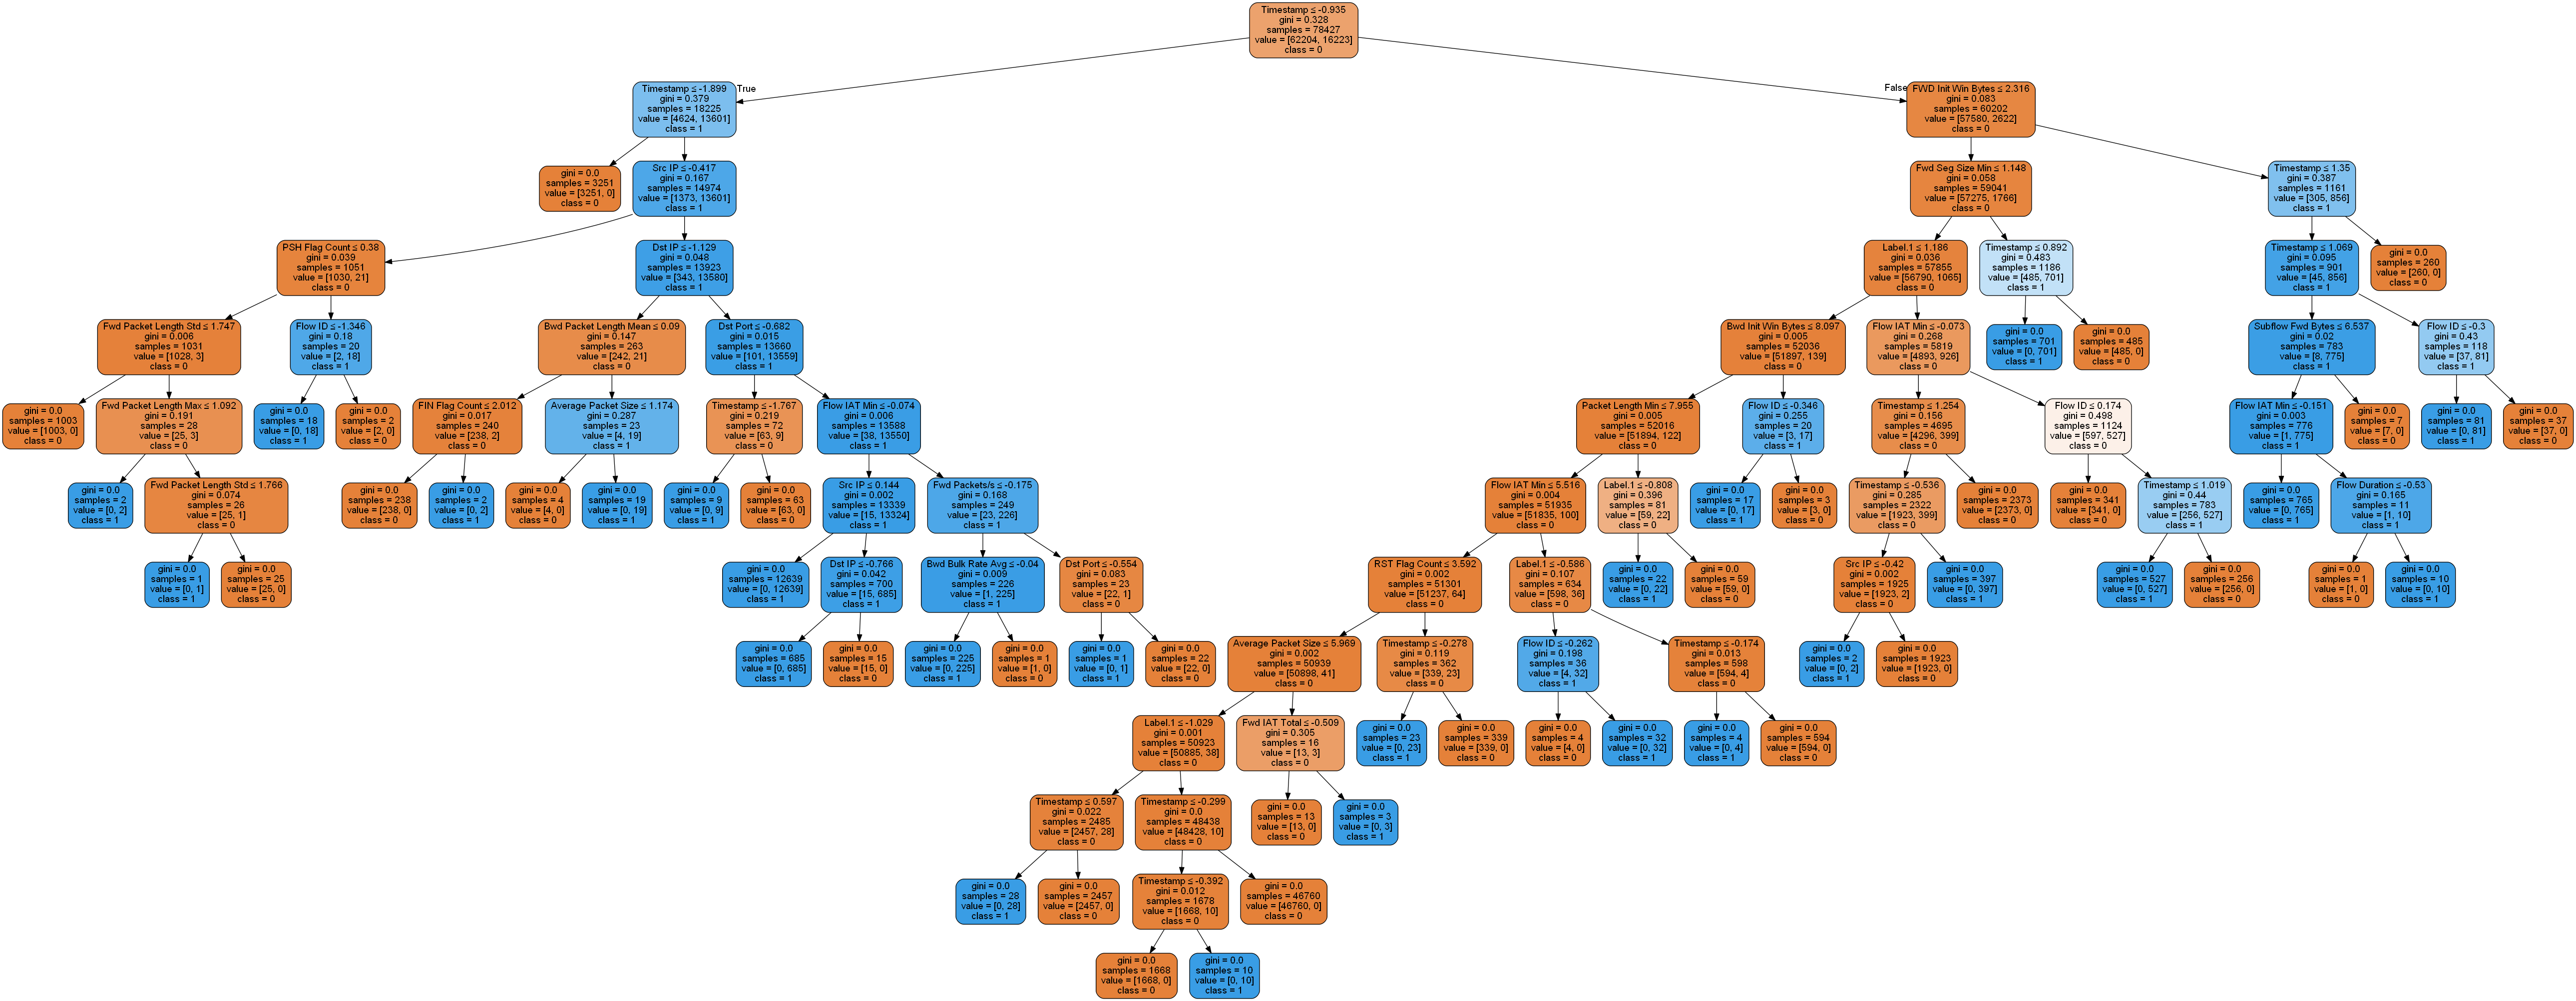

In [26]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decisiontree.png')
Image(graph.create_png())

### Applying Decision Tree Classifier after Feature Selection

In [27]:
clf1 = DecisionTreeClassifier()
clf1= clf1.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred11 = clf1.predict(X_test1)

In [28]:
cm51 = metrics.confusion_matrix(y_test1, y_pred11)
print("Confusion Matrix for Decision Tree:")
print(cm51)

Confusion Matrix for Decision Tree:
[[30752     2]
 [    1  7874]]


In [29]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred11))
print ("Precision: ", precision_score(y_test1, y_pred11,average='weighted'))
print ("Recall score:  ", recall_score(y_test1, y_pred11,average='weighted'))
print ("F1 score: ", f1_score(y_test1, y_pred11,average='weighted'))

Accuracy: 0.9999223381397395
Precision:  0.999922343871673
Recall score:   0.9999223381397395
F1 score:  0.9999223399737135


In [30]:
print(metrics.classification_report(y_test1, y_pred11))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30754
           1       1.00      1.00      1.00      7875

    accuracy                           1.00     38629
   macro avg       1.00      1.00      1.00     38629
weighted avg       1.00      1.00      1.00     38629



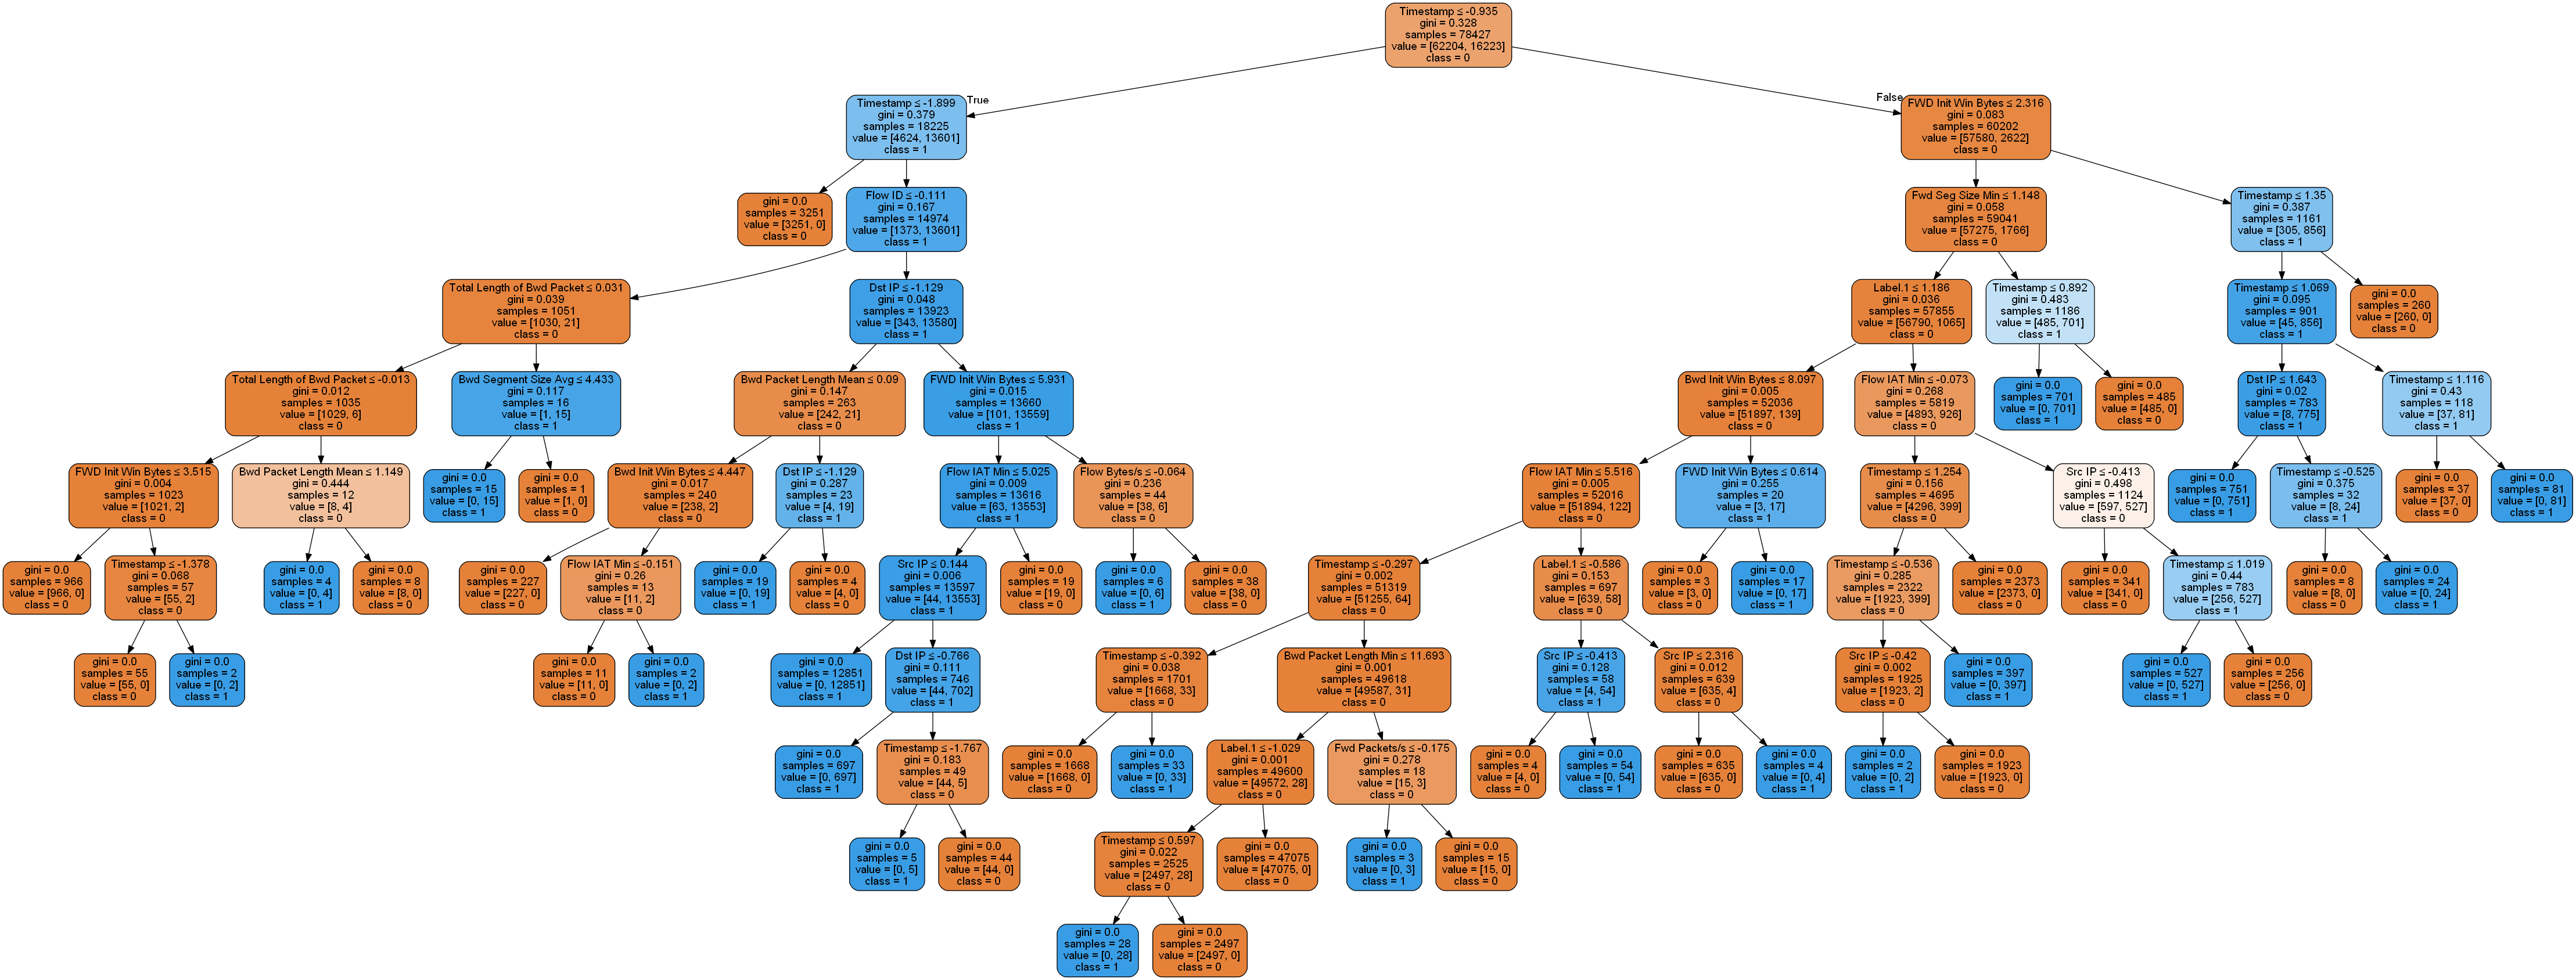

In [31]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  filled=True, rounded=True,special_characters=True,feature_names = selected_feat,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decisiontree11.png')
Image(graph.create_png())

### Applying Support Vector Machine before Feature Selection

In [32]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [33]:
predic = svc.predict(X_test)

In [34]:
score=svc.score(X_test, y_test)
print("Accuracy for Support Vector Machine:" ,score)
print ("Precision for Support Vector Machine: ", precision_score(y_test,  predic,average='weighted'))
print ("Recall score for Support Vector Machine: ", recall_score(y_test,  predic,average='weighted'))
print ("F1 score for Support Vector Machine: ", f1_score(y_test,  predic,average='weighted'))

Accuracy for Support Vector Machine: 0.9925703487017525
Precision for Support Vector Machine:  0.992555778678634
Recall score for Support Vector Machine:  0.9925703487017525
F1 score for Support Vector Machine:  0.9925517477391257


In [35]:
from sklearn import metrics
cm3 = metrics.confusion_matrix(y_test, predic)
print("Confusion Matrix for Support Vector Machine:")
print(cm3)

Confusion Matrix for Support Vector Machine:
[[30663    91]
 [  196  7679]]


### Applying Support Vector Machine after Feature Selection

In [36]:
svc1 = SVC(probability=True)
svc1.fit(X_train1, y_train1)
predic1 = svc1.predict(X_test1)

In [37]:
score=svc1.score(X_test1, y_test1)
print("Accuracy for Support Vector Machine:" ,score)
print ("Precision for Support Vector Machine: ", precision_score(y_test1,  predic1,average='weighted'))
print ("Recall score for Support Vector Machine: ", recall_score(y_test1,  predic1,average='weighted'))
print ("F1 score for Support Vector Machine: ", f1_score(y_test1,  predic1,average='weighted'))

Accuracy for Support Vector Machine: 0.9938647130394264
Precision for Support Vector Machine:  0.9938582846859035
Recall score for Support Vector Machine:  0.9938647130394264
F1 score for Support Vector Machine:  0.9938478744183149


In [38]:
cm31 = metrics.confusion_matrix(y_test1, predic)
print("Confusion Matrix for Support Vector Machine:")
print(cm31)

Confusion Matrix for Support Vector Machine:
[[30663    91]
 [  196  7679]]


### Applying Logistic Regression before Feature Selection

In [39]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

C:\Users\sahit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
logisticRegr.predict(X_test[0:10])
predictions = logisticRegr.predict(X_test)
cm10 = metrics.confusion_matrix(y_test, predictions)
print("Confusion Matrix for Logistic Regression:")
print(cm10)

Confusion Matrix for Logistic Regression:
[[29697  1057]
 [ 1133  6742]]


In [41]:
score = logisticRegr.score(X_test, y_test)
print("Accuracy for Logistic Regression:" ,score)
print ("Precision for Logistic Regression: ", precision_score(y_test,  predictions ,average='weighted'))
print ("Recall score for Logistic Regression: ", recall_score(y_test,  predictions ,average='weighted'))
print ("F1 score for Logistic Regression: ", f1_score(y_test,  predictions ,average='weighted'))

Accuracy for Logistic Regression: 0.9433068420098889
Precision for Logistic Regression:  0.9431124983542822
Recall score for Logistic Regression:  0.9433068420098889
F1 score for Logistic Regression:  0.9432043774208704


In [42]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     30754
           1       0.86      0.86      0.86      7875

    accuracy                           0.94     38629
   macro avg       0.91      0.91      0.91     38629
weighted avg       0.94      0.94      0.94     38629



### Applying Logistic Regression after Feature Selection

In [43]:
logisticRegr1= LogisticRegression()
logisticRegr1.fit(X_train1, y_train1)

LogisticRegression()

In [44]:
logisticRegr1.predict(X_test1[0:10])
predictions = logisticRegr1.predict(X_test1)
cm10 = metrics.confusion_matrix(y_test1, predictions)
print("Confusion Matrix for Logistic Regression:")
print(cm10)

Confusion Matrix for Logistic Regression:
[[29490  1264]
 [ 1436  6439]]


In [45]:
score = logisticRegr1.score(X_test1, y_test1)
print("Accuracy for Logistic Regression:" ,score)
print ("Precision for Logistic Regression: ", precision_score(y_test1,  predictions ,average='weighted'))
print ("Recall score for Logistic Regression: ", recall_score(y_test1,  predictions ,average='weighted'))
print ("F1 score for Logistic Regression: ", f1_score(y_test1,  predictions ,average='weighted'))

Accuracy for Logistic Regression: 0.9301043257656165
Precision for Logistic Regression:  0.929580438003303
Recall score for Logistic Regression:  0.9301043257656165
F1 score for Logistic Regression:  0.9298159143463754


In [46]:
print(metrics.classification_report(y_test1, predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     30754
           1       0.84      0.82      0.83      7875

    accuracy                           0.93     38629
   macro avg       0.89      0.89      0.89     38629
weighted avg       0.93      0.93      0.93     38629



### Applying KNN before Feature Selection

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classi = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classi.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
y_pre = classi.predict(X_test) 
cm2 = metrics.confusion_matrix(y_test, y_pre) 
print("Confusion Matrix for KNN:")
print(cm2)

Confusion Matrix for KNN:
[[30616   138]
 [  189  7686]]


In [49]:
print(metrics.classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     30754
           1       0.98      0.98      0.98      7875

    accuracy                           0.99     38629
   macro avg       0.99      0.99      0.99     38629
weighted avg       0.99      0.99      0.99     38629



In [50]:
print ("Accuracy for KNN : ", accuracy_score(y_test, y_pre))
print ("Precision for KNN: ", precision_score(y_test,  y_pre ,average='weighted'))
print ("Recall score for KNN: ", recall_score(y_test,  y_pre ,average='weighted'))
print ("F1 score for KNN: ", f1_score(y_test,  y_pre ,average='weighted'))

Accuracy for KNN :  0.9915348572316136
Precision for KNN:  0.9915196708139505
Recall score for KNN:  0.9915348572316136
F1 score for KNN:  0.9915246138117986


### Applying KNN after Feature Selection

In [51]:
classi1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classi1.fit(X_train1, y_train1)

KNeighborsClassifier()

In [52]:
y_pre = classi1.predict(X_test1) 
cm2 = metrics.confusion_matrix(y_test1, y_pre) 
print("Confusion Matrix for KNN:")
print(cm2)

Confusion Matrix for KNN:
[[30686    68]
 [   97  7778]]


In [53]:
print(metrics.classification_report(y_test1, y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30754
           1       0.99      0.99      0.99      7875

    accuracy                           1.00     38629
   macro avg       0.99      0.99      0.99     38629
weighted avg       1.00      1.00      1.00     38629



In [54]:
print ("Accuracy for KNN : ", accuracy_score(y_test1, y_pre))
print ("Precision for KNN: ", precision_score(y_test1,  y_pre ,average='weighted'))
print ("Recall score for KNN: ", recall_score(y_test1,  y_pre ,average='weighted'))
print ("F1 score for KNN: ", f1_score(y_test1,  y_pre ,average='weighted'))

Accuracy for KNN :  0.9957285976856766
Precision for KNN:  0.9957244568418856
Recall score for KNN:  0.9957285976856766
F1 score for KNN:  0.9957256645026501


### ROC Curve before Feature Selection

In [55]:
from sklearn.metrics import roc_curve
predp1 = logisticRegr .predict_proba(X_test)
predp2 = classi.predict_proba(X_test)
predp3=classifier.predict_proba(X_test)
predp4=clf.predict_proba(X_test)
y_proba = svc.predict_proba(X_test)

In [56]:
fpr1, tpr1, thresh1 = roc_curve(y_test, predp1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, predp2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, predp3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, predp4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, y_proba[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [57]:
print("Logistic Regression TPR : ",tpr1)
print(" FPR : ",fpr1)
print("KNN TPR : ",tpr2)
print(" FPR : ",fpr2)
print("Naive Bayes TPR : ",tpr3)
print(" FPR : ",fpr3)
print("Decision Tree TPR : ",tpr4)
print(" FPR : ",fpr4)
print("SVM TPR : ",tpr5)
print(" FPR : ",fpr5)

Logistic Regression TPR :  [0.00000000e+00 1.26984127e-04 1.26984127e-03 ... 9.99873016e-01
 1.00000000e+00 1.00000000e+00]
 FPR :  [0.00000000e+00 6.50321909e-05 6.50321909e-05 ... 9.95350198e-01
 9.95350198e-01 1.00000000e+00]
KNN TPR :  [0.         0.94590476 0.96203175 0.976      0.98590476 0.99352381
 1.        ]
 FPR :  [0.00000000e+00 7.47870196e-04 2.04851401e-03 4.48722117e-03
 7.38115367e-03 1.37543084e-02 1.00000000e+00]
Naive Bayes TPR :  [0.         0.30184127 0.30196825 ... 0.99949206 0.99949206 1.        ]
 FPR :  [0.         0.01011251 0.01014502 ... 0.99561033 0.99655329 1.        ]
Decision Tree TPR :  [0.         0.99949206 1.        ]
 FPR :  [0.00000000e+00 1.30064382e-04 1.00000000e+00]
SVM TPR :  [0.00000000e+00 1.26984127e-04 4.04952381e-01 4.04952381e-01
 5.11238095e-01 5.11238095e-01 7.02603175e-01 7.02603175e-01
 8.60317460e-01 8.60317460e-01 9.09206349e-01 9.09206349e-01
 9.31682540e-01 9.31682540e-01 9.38793651e-01 9.38793651e-01
 9.40063492e-01 9.40063492e

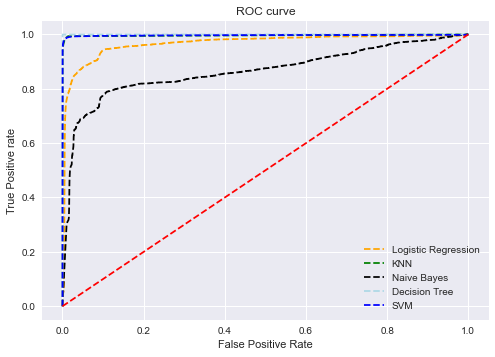

In [58]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='Naive Bayes')
plt.plot(fpr4, tpr4, linestyle='--',color='#ADD8E6', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--',color='blue', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC23',dpi=300)
plt.show();

### ROC Curve after Feature Selection

In [59]:
predp1 = logisticRegr1 .predict_proba(X_test1)
predp2 = classi1.predict_proba(X_test1)
predp3=classifier1.predict_proba(X_test1)
predp4=clf1.predict_proba(X_test1)
y_proba = svc1.predict_proba(X_test1)

In [60]:
fpr1, tpr1, thresh1 = roc_curve(y_test1, predp1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test1, predp2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test1, predp3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test1, predp4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test1, y_proba[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test1))]
p_fpr, p_tpr, _ = roc_curve(y_test1, random_probs, pos_label=1)

In [61]:
print("Logistic Regression TPR : ",tpr1)
print(" FPR : ",fpr1)
print("KNN TPR : ",tpr2)
print(" FPR : ",fpr2)
print("Naive Bayes TPR : ",tpr3)
print(" FPR : ",fpr3)
print("Decision Tree TPR : ",tpr4)
print(" FPR : ",fpr4)
print("SVM TPR : ",tpr5)
print(" FPR : ",fpr5)

Logistic Regression TPR :  [0.00000000e+00 1.26984127e-04 8.12698413e-03 ... 9.99873016e-01
 1.00000000e+00 1.00000000e+00]
 FPR :  [0.         0.         0.         ... 0.99561033 0.99561033 1.        ]
KNN TPR :  [0.         0.97092063 0.98107937 0.98768254 0.992      0.99606349
 1.        ]
 FPR :  [0.00000000e+00 2.92644859e-04 1.04051505e-03 2.21109449e-03
 3.41419002e-03 6.86089614e-03 1.00000000e+00]
Naive Bayes TPR :  [0.         0.04977778 0.05028571 ... 1.         1.         1.        ]
 FPR :  [0.         0.00500748 0.00503999 ... 0.9983742  0.99863432 1.        ]
Decision Tree TPR :  [0.         0.99987302 1.        ]
 FPR :  [0.00000000e+00 6.50321909e-05 1.00000000e+00]
SVM TPR :  [0.00000000e+00 1.26984127e-04 6.22222222e-03 6.22222222e-03
 2.51428571e-02 2.51428571e-02 4.11428571e-02 4.11428571e-02
 4.11555556e-01 4.11555556e-01 7.80063492e-01 7.80063492e-01
 7.83365079e-01 7.83365079e-01 7.97079365e-01 7.97079365e-01
 8.41523810e-01 8.41523810e-01 9.33968254e-01 9.3396

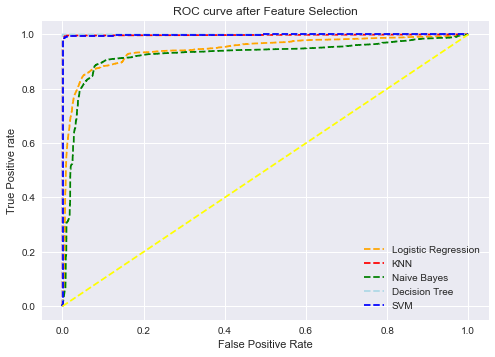

In [62]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='Naive Bayes')
plt.plot(fpr4, tpr4, linestyle='--',color='#ADD8E6', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--',color='blue', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='yellow')
# title
plt.title('ROC curve after Feature Selection')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC10',dpi=300)
plt.show();